In [214]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

In [215]:
fparams = {'axes.labelsize': 18,
           'axes.titlesize': 18,
           'font.size': 18,
           'legend.fontsize': 16,
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'text.usetex': True,
           'image.cmap': 'seismic', 
           'figure.figsize': (5,5),
           'figure.autolayout': True}
plt.rcParams.update(fparams)

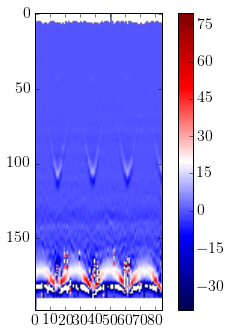

In [227]:
# get the original data
original_data = np.load("data_fig4/Dev1_3_302_0mT.npy")
z = original_data[:,:,2] # This way the columns of z contain frequency scans starting from low frequency
z[z < -40] = np.nan
z[z > 80] = np.nan
freq = 1e6 * np.abs(original_data[:,0,1]) # Convert to µV
field = original_data[0,:,0]
plt.figure(figsize=(5,5))
plt.imshow(z)
plt.colorbar()

([], <a list of 0 Text xticklabel objects>)

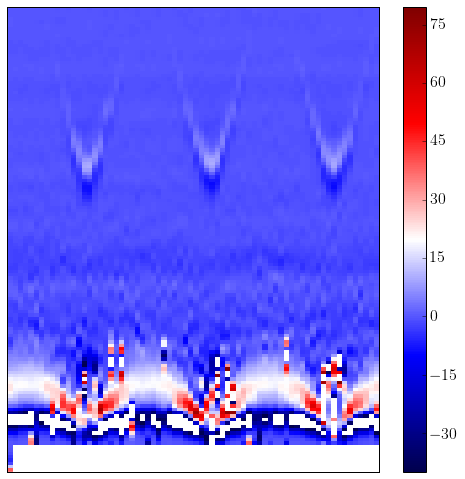

In [228]:
# cut the data set to focus on interesting regions
#z = z[60:130,:70]
#freq = freq[60:130]
z = z[60:,:70]
freq = freq[60:]
field = field[:70]
dy = abs(freq[1]-freq[0])
dx = abs(field[1]-field[0])
ranges = [min(field)-dx/2, max(field)+dx/2, min(freq)-dy/2, max(freq)+dy/2]
plt.figure(figsize=(7,7))
plt.imshow(z, extent=[min(field), max(field), min(freq), max(freq)], aspect='auto', interpolation='none')
plt.colorbar()
plt.yticks([])
plt.xticks([])

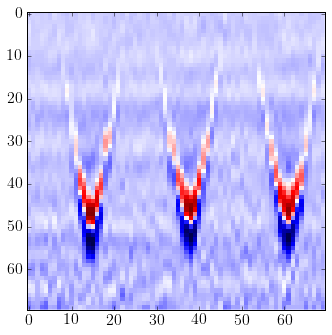

In [229]:
plt.imshow(z[:70,:], interpolation='none')

In [230]:
#B0 = find_symmetry_axis(field, freq, z[:70,:], i=5, s=20, plot=False)
#Bpi = find_symmetry_axis(field, freq, z[:70,:], i=30, s=5, plot=False)

In [231]:
# Calibrates flux by finding two vertical axes of symmetry in the data
#B0 = find_symmetry_axis(field, freq, z, i=0, s=20, plot=False)
#Bpi = find_symmetry_axis(field, freq, z, i=25, s=5, plot=False)
B0 = find_symmetry_axis(field, freq, z[:70,:], i=0, s=20, plot=False)
Bpi = find_symmetry_axis(field, freq, z[:70,:], i=25, s=5, plot=False)
# The position of one of the two axes of symmetry must be adjusted due to finite resolution of the data
#B0 -= dx / 2
# Linear rescaling of the horizontal axis: from field to flux
a, b =  2 * (Bpi - B0), B0
flux_axis = 2 * np.pi * (field - b) / a
dflux = abs(flux_axis[1]-flux_axis[0])
flux_ranges = [min(flux_axis)-dflux/2, max(flux_axis)+dflux/2,
               min(freq)-dy/2, max(freq)+dy/2]

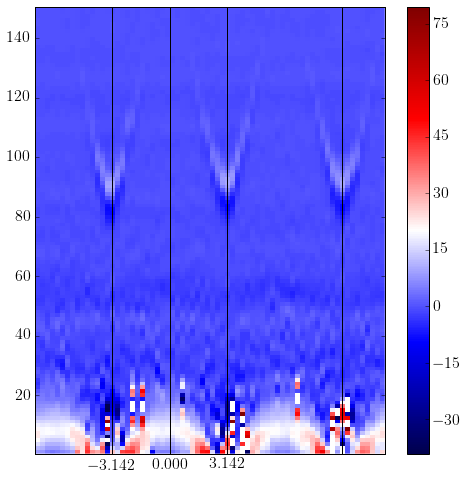

In [232]:
plt.figure(figsize=(7,7))
plt.imshow(z[:-20], extent=flux_ranges, aspect='auto', interpolation='none')
plt.axvline(0, c='k')
plt.axvline(np.pi, c='k')
plt.axvline(3 * np.pi, c='k')
plt.axvline(-np.pi, c='k')
plt.xticks([0, np.pi, -np.pi])
plt.colorbar()

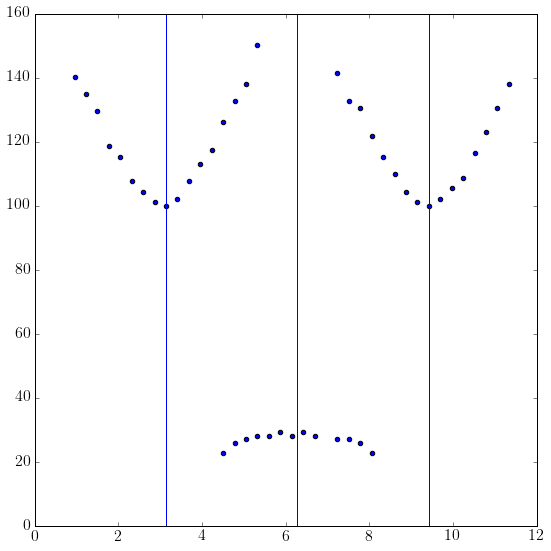

In [233]:
# The peak position are simply chosen as the maxima of each data cut for a fixed phase.
# In this case we exclude the LC resonance
# The ABS peaks, which are weaker, are found by excluding the frequency range with the LC resonance.
lc_pos = np.array([freq[np.argmax(d[:-20])] for d in z.T])
abs_pos = np.array([freq[np.argmax(d[:70])] for d in z.T])
lc_line = zip(flux_axis, lc_pos)
abs_line = zip(flux_axis, abs_pos)
# Limit flux range of data and eliminate some spurious points
lc_line = [l for l in lc_line if np.abs(l[0]-2*np.pi) <2]
lc_line = [l for l in lc_line if l[1] < 30]
#lc_line = [l for l in lc_line if not (l[0]> 2.4 and l[0]<6)]
abs_line = [a for a in abs_line if a[0]>0.75]
abs_line = [a for a in abs_line if a[0]<11.5]
abs_line = [a for a in abs_line if not (a[0]> 5.5 and a[0]<7)]
lines = lc_line + abs_line
phase, frequency = zip(*lines)
plt.figure(figsize=(8,8))
plt.scatter(phase, frequency)
plt.axvline(np.pi)
plt.axvline(2*np.pi)
plt.axvline(3*np.pi)

In [234]:
len(lc_line)

13

## Fit with two free parameters

In [237]:
#%%capture
#p0 = [120, 0.4]
#fit_2 = fit_abs_model(lines, 13, p0, n=5, Ej=75.5, Ec=43.2, max_tol=5e-4)
#pickle.dump(fit_2, open('fit_fig_4_zero_field.pickle', 'wb'))

In [235]:
fit_two_params_results = pickle.load(open('fit_fig_4_zero_field.pickle', 'rb'))
fit_two_params_results['popt']

array([ 155.37439197,    0.66570721])

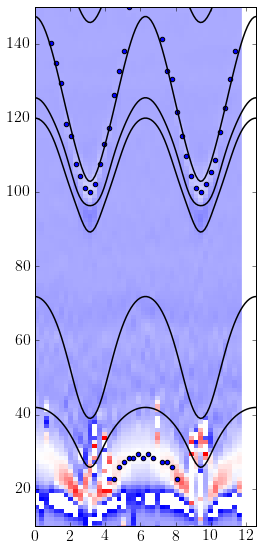

In [236]:
fluxes, freqs = use_fit_results(fit_two_params_results, lines, Ej=75.5, Ec=43.2,
                                n_fluxes=100, flux_min=0, flux_max=4*np.pi, m_tol=5e-4)
plot_fit_on_data(flux_axis, freq, z, fluxes, freqs, lines, flux_lims=[min(fluxes), max(fluxes)])

## Fit with three free parameters

In [108]:
#%%capture
#p0 = [40., 120, 0.8]
#fit_2 = fit_abs_model(lines, 13, p0, n=5, Ej=75.5, max_tol=5e-4)
#pickle.dump(fit_2, open('fit_fig_4_zero_field_three_params.pickle', 'wb'))

In [238]:
fit_three_params_results = pickle.load(open('fit_fig_4_zero_field_three_params.pickle', 'rb'))
fit_three_params_results['popt']

array([  23.98990723,  158.15781365,    0.66528886])

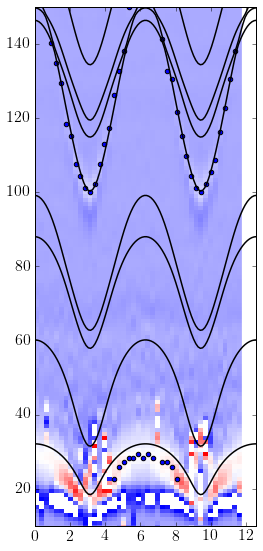

In [239]:
fluxes, freqs = use_fit_results(fit_three_params_results, lines, Ej=75.5,
                                n_fluxes=100, flux_min=0, flux_max=4*np.pi, m_tol=5e-4)
plot_fit_on_data(flux_axis, freq, z, fluxes, freqs, lines, flux_lims=[min(fluxes), max(fluxes)])

## Fit with four free parameters

In [240]:
#%%capture
#p0 = [40., 75.5, 120., 0.5]
#fit_3 = fit_abs_model(lines, 13, p0, n=5, max_tol=5e-4)
#pickle.dump(fit_3, open('fit_fig_4_zero_field_four_params.pickle', 'wb'))

In [241]:
fit_four_params_results = pickle.load(open('fit_fig_4_zero_field_four_params.pickle', 'rb'))
fit_four_params_results['popt']

array([  26.94224561,   55.52330341,  162.25310397,    0.71530902])

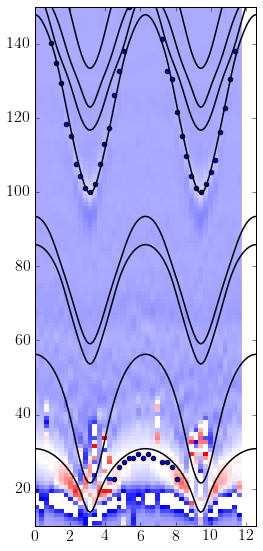

In [242]:
fluxes, freqs = use_fit_results(fit_four_params_results, lines, n_fluxes=100, flux_min=0, flux_max=4*np.pi, m_tol=5e-4)
plot_fit_on_data(flux_axis, freq, z, fluxes, freqs, lines, flux_lims=[min(fluxes), max(fluxes)])

## Fitting parameters from the ABS energy directly

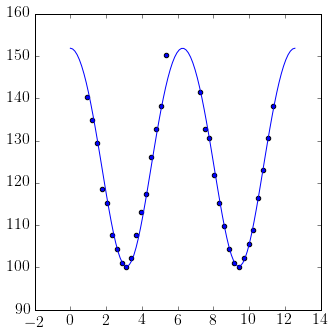

In [244]:
from scipy.optimize import curve_fit
phase, frequency = zip(*abs_line)
popt, pcov = curve_fit(lambda x, a, b: a * np.sqrt(1- b * np.sin(x/2)**2), phase, frequency, p0=[100, 0.5])
phases = np.linspace(0, 4*np.pi, 100)
ens = np.array([popt[0] * np.sqrt(1- popt[1] * np.sin(ph/2)**2) for ph in phases])
plt.scatter(phase, frequency)
plt.plot(phases, ens)

In [247]:
gap, tau = popt
print gap, tau

151.845250913 0.564375181196


## Figure panels

In [249]:
p_fit = SimpleNamespace(flux=np.pi, Ec=43.2, Ej=75.5, Ea =151.8, T =0.564)
p_fit.M = find_optimal_M(p_fit, max_tol=5e-4, verbose=False) + 70
fluxes = np.linspace(0, 4*np.pi, 150)
evals = []
for (n, flux) in enumerate(fluxes):
    p_fit.flux = flux
    evs = np.linalg.eigvalsh(create_hamiltonian(p_fit, p_fit.M))
    evals.append(evs)
voltages = 0.5 * np.array([(ev - ev[0])[1:] for ev in evals])

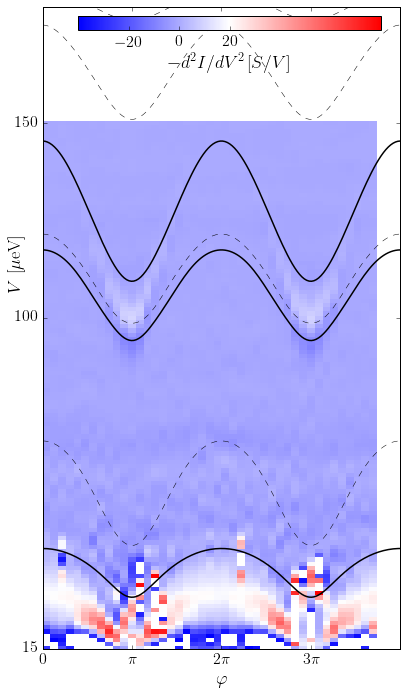

In [250]:
fig, ax = plt.subplots(figsize=(6,10))
im = ax.imshow(z, extent = flux_ranges, aspect='auto', interpolation='none',
               vmin=-40, vmax = 80, cmap='bwr')
cbaxes = fig.add_axes([0.21, 0.94, 0.7, 0.02]) 
cbar = fig.colorbar(im, cax=cbaxes, orientation='horizontal')
cbaxes.set_xlabel(r'$-d^2 I/dV^2\, [S/V]$')
cbar.set_ticks([-20, 0, 20])
#cbar.set_clim([np.min(z), np.max(z)])
ax.plot(fluxes, voltages.T[0], c='k', ls='-', lw=1.5)
ax.plot(fluxes, voltages.T[1], c='k', ls='--', lw=0.5)
ax.plot(fluxes, voltages.T[2], c='k', ls='-', lw=1.5)
ax.plot(fluxes, voltages.T[3], c='k', ls='--', lw=0.5)
ax.plot(fluxes, voltages.T[4], c='k', ls='-', lw=1.5)
ax.plot(fluxes, voltages.T[5], c='k', ls='--', lw=0.5)
ax.plot(fluxes, voltages.T[6], c='k', ls='--', lw=0.5)
#phase, frequency = zip(*lines)
#ax.scatter(phase, frequency)
ax.set_xlim(0, 4*np.pi)
ax.set_ylim([20, 180])
ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi])
ax.set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
ax.set_yticks([15, 100, 150])
ax.set_xlabel(r'$\varphi$')
ax.set_ylabel(r'$V\,\,[\mu$eV]', y=0.6, labelpad=-10)
#ax.text(5, 46, r'$0\to1$', fontsize=15)
#ax.text(5, 78, r'$0\to2$', fontsize=15)
#ax.text(5, 102, r'$0\to3$', fontsize=15)
#ax.text(5, 125, r'$0\to4$', fontsize=15)
#plt.savefig("figures/fit_dev_92.pdf")
fig.show()

In [253]:
p_fit.flux = 0.
wf0_gs, wf0_es = return_wavefunction(p_fit, 201, 0)
wf1_gs, wf1_es = return_wavefunction(p_fit, 201, 1)
wf2_gs, wf2_es = return_wavefunction(p_fit, 201, 3)
wf3_gs, wf3_es = return_wavefunction(p_fit, 201, 5)

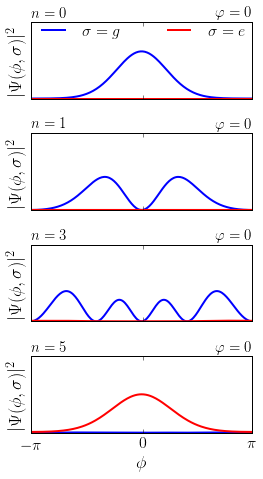

In [254]:
f, ax = plt.subplots(4, sharex=True, sharey=True, figsize=(4,7))

ax[0].plot(np.abs(wf0_gs)**2, c='b', lw=2, label=r'$\sigma=g$')
ax[0].plot(np.abs(wf0_es)**2, c='r', lw=2, label=r'$\sigma=e$')
ax[0].set_ylabel(r'$|\Psi(\phi, \sigma)|^2$')
ax[0].set_ylim([0, 0.028])
ax[0].set_yticks([])
ax[0].legend(bbox_to_anchor=(0., 0.7, 1., .05),
             loc=3, ncol=2, mode="expand", borderaxespad=0., frameon=False)
ax[0].set_title(r'$n=0$', fontsize=15, loc='left')
ax[0].set_title(r'$\varphi=0$', fontsize=15, loc='right')

ax[1].plot(np.abs(wf1_gs)**2, c='b', lw=2)
ax[1].plot(np.abs(wf1_es)**2, c='r', lw=2)
ax[1].set_ylabel(r'$|\Psi(\phi, \sigma)|^2$')
ax[1].set_title(r'$n=1$', fontsize=15, loc='left')
ax[1].set_title(r'$\varphi=0$', fontsize=15, loc='right')

ax[2].plot(np.abs(wf2_gs)**2, c='b', lw=2)
ax[2].plot(np.abs(wf2_es)**2, c='r', lw=2)
ax[2].set_ylabel(r'$|\Psi(\phi, \sigma)|^2$')
ax[2].set_title(r'$n=3$', fontsize=15, loc='left')
ax[2].set_title(r'$\varphi=0$', fontsize=15, loc='right')

ax[3].plot(np.abs(wf3_gs)**2, c='b', lw=2)
ax[3].plot(np.abs(wf3_es)**2, c='r', lw=2)
ax[3].set_ylabel(r'$|\Psi(\phi, \sigma)|^2$')
ax[3].set_xticks([0, 101, 200])
ax[3].set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax[3].set_xlabel(r'$\phi$')
ax[3].set_title(r'$n=5$', fontsize=15, loc='left')
ax[3].set_title(r'$\varphi=0$', fontsize=15, loc='right')
#plt.savefig("figures/wavefunction_dev_92.pdf")

In [255]:
fluxes = np.linspace(0, 2*np.pi, 200)
mat_elems = current_matrix_elements(p_fit, 151, fluxes).T

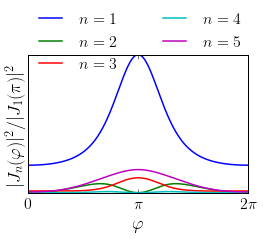

In [256]:
jmax = np.abs(np.max(mat_elems[1]))
fig, ax = plt.subplots(figsize=(4,3))
for (n, m) in enumerate(mat_elems[1:6]):
    ax.plot(fluxes, np.abs(m)**2/jmax**2, lw=1.5, label=r'$n={0}$'.format(n+1))
ax.legend(bbox_to_anchor=(0., 0.83, 1, .02),
             loc=3, ncol=2, mode="expand", borderaxespad=0., frameon=False)
ax.set_xlim(0, 2*np.pi)
#ax.set_ylim(0, 1)
ax.set_yticks([])
#ax.set_yticklabels([r'$0$', r'$0.07$'])
ax.set_xlabel(r'$\varphi$')
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$'])
ax.set_ylabel(r'$|J_{n}(\varphi)|^2/|J_{1}(\pi)|^2$', labelpad=+2)
#plt.savefig("figures/matrix_elements_dev_92.pdf")

## Behavior in field

In [257]:
minima = [(0, 1.01809e-4),(50, 9.98742e-5),(75, 9.58812e-5),(100,9.2654e-5),
          (150,8.38036e-5),(200,7.27897e-5),(300,4.26e-5)]
Bs, Es = np.asarray(zip(*minima))
Es *= 1e6

In [421]:
E_0 = lambda tau, phi : np.sqrt(1 - tau * np.sin(phi/2)**2)
f_1 = lambda beta, tau, phi: tau * (tau * np.sin(phi/2)**2 - 2 * (1 - tau) + tau * beta**2)
f_2 = lambda beta, tau, phi: 2 * tau * np.sqrt(E_0(tau, phi)**2 * tau * np.sin(phi/2)**2 \
                                               + tau**2 * beta**2 * np.cos(phi/2)**2)
f_3 = lambda beta, tau, phi: tau * (4 * tau - 2 + tau * beta**2)
    
def andreev_energies(beta, tau, phi, sigma):
    num_1 = E_0(tau, phi)**2 + beta**2 * f_1(beta, tau, phi)
    num_2 = beta * f_2(beta, tau, phi)
    den = 1 + beta**2 * f_3(beta, tau, phi)
    return np.sqrt((num_1 + sigma * num_2)/den)

def transition_energy(beta, tau, A, follow_parity=True):
    beta_c = np.sqrt(1-tau) / np.sqrt(tau)
    en_up = A * andreev_energies(beta[0], tau, np.pi, 1.)
    en_down = A * andreev_energies(beta[0], tau, np.pi, -1.)
    if follow_parity:
        if beta[0] < beta_c:
            return 0.5 * (en_up + en_down)
        else:
            return 0.5 * (en_up - en_down)
    else:
        return 0.5 * (en_up + en_down)
    
def residuals_transition_energies(a, xs, ys, tau, A, follow_parity=True):
    energies = np.array([transition_energy(a * x, tau, A, follow_parity) for x in xs])
    return energies - ys

def Andreev_energies_Michelsen(beta, tau, phi, sigma):
    return np.abs(np.cos(np.arcsin(np.sqrt(tau)*np.sin(phi/2)) - sigma * beta /2))

# Ratio of Thouless energy and g-factor
ET_over_G = lambda x: 57.8 * 1e-3 / x

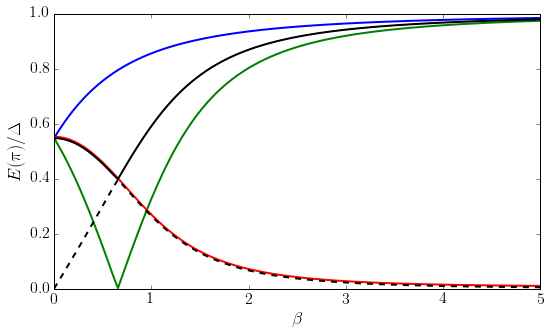

In [422]:
betas = np.linspace(0, 5, 100)
plt.figure(figsize=(8,5))
plt.plot(betas, andreev_energies(betas, 0.7, np.pi, +1), lw=2)
plt.plot(betas, andreev_energies(betas, 0.7, np.pi, -1), lw=2)
plt.plot(betas, 0.5 * andreev_energies(betas, 0.7, np.pi, 1) +  0.5 * andreev_energies(betas, 0.7, np.pi, -1))
plt.plot(betas, np.array([transition_energy([b], 0.7, 1, True) + 0.005 for b in betas]), c='r', lw=2)
plt.plot(betas, 0.5 * andreev_energies(betas, 0.7, np.pi, 1) -  0.5 * andreev_energies(betas, 0.7, np.pi, -1), ls='--', c='k', lw=2)
plt.plot(betas, np.array([transition_energy([b], 0.7, 1, False) for b in betas]), c='k', lw=2)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$E(\pi)/\Delta$')

## Comparison with Michelsen

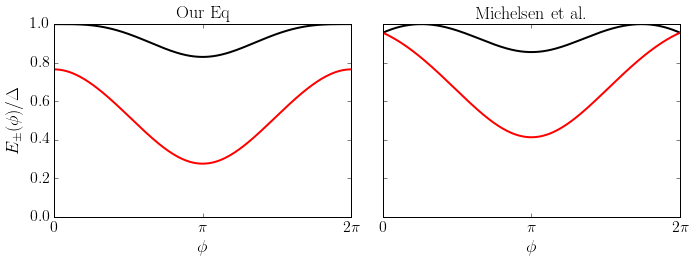

In [423]:
phis = np.linspace(0, 2*np.pi, 200)
en_plus = andreev_energies(0.6, 0.56, phis, 1)
en_minus = andreev_energies(0.6, 0.56, phis, -1)
en_michelsen_plus = Andreev_energies_Michelsen(0.6, 0.56, phis, 1)
en_michelsen_minus = Andreev_energies_Michelsen(0.6, 0.56, phis, -1)
f, ax = plt.subplots(1, 2, sharey=True, figsize=(10,4))
ax[0].plot(phis, en_plus, c='k', lw=2)
ax[0].plot(phis, en_minus, c='r', lw=2)
ax[0].set_xlim([0, 2*np.pi])
ax[0].set_ylim([0, 1])
ax[0].set_title(r"Our Eq")
ax[0].set_ylabel(r"$E_\pm(\phi)/\Delta$")
ax[0].set_xlabel(r"$\phi$")
ax[0].set_xticks([0, np.pi, 2*np.pi])
ax[0].set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$'])
ax[1].plot(phis, en_michelsen_plus, c='k', lw=2)
ax[1].plot(phis, en_michelsen_minus, c='r', lw=2)
ax[1].set_xlim([0, 2*np.pi])
ax[1].set_xlabel(r"$\phi$")
ax[1].set_title(r"Michelsen et al.")
ax[1].set_xticks([0, np.pi, 2*np.pi])
ax[1].set_xticklabels([r'$0$', r'$\pi$', r'$2\pi$'])

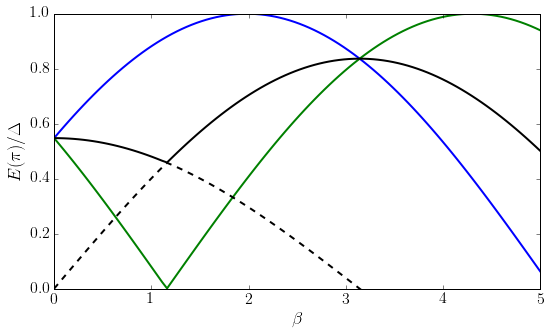

In [404]:
plt.figure(figsize=(8,5))
plt.plot(betas, Andreev_energies_Michelsen(betas, 0.7, np.pi, +1), lw=2)
plt.plot(betas, Andreev_energies_Michelsen(betas, 0.7, np.pi, -1), lw=2)
plt.plot(betas, 0.5 * Andreev_energies_Michelsen(betas, 0.7, np.pi, 1) + 0.5 * Andreev_energies_Michelsen(betas, 0.7, np.pi, -1), c='k', lw=2)
#plt.plot(betas, np.array([transition_energy([b], 0.7, 1, True) + 0.005 for b in betas]), c='r', lw=2)
plt.plot(betas, 0.5 * Andreev_energies_Michelsen(betas, 0.7, np.pi, 1) -  0.5 * Andreev_energies_Michelsen(betas, 0.7, np.pi, -1), ls='--', c='k', lw=2)
#plt.plot(betas, np.array([transition_energy([b], 0.7, 1, False) for b in betas]), c='k', lw=2)
plt.ylim(0, 1)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$E(\pi)/\Delta$')

## Fit following parity

In [424]:
tau, D = 0.56, 151.8
beta_c = np.sqrt(1-tau)/np.sqrt(tau)
(popt, pcov, infodict, errmsg, ier) = leastsq(residuals_transition_energies, x0=[0.01],
                                              args=(Bs, Es, tau, D, False), full_output=1)
fields = np.linspace(0, 1000, 200)
energies = np.array([transition_energy([f * popt[0]], tau, D) for f in fields])
energies_2 = np.array([transition_energy([f * popt[0]], tau, D, False) for f in fields])
print 'E_T/g: ', ET_over_G(popt[0])
print 'Bc: ', beta_c / popt[0]

E_T/g:  19.5621581809
Bc:  299.999998561


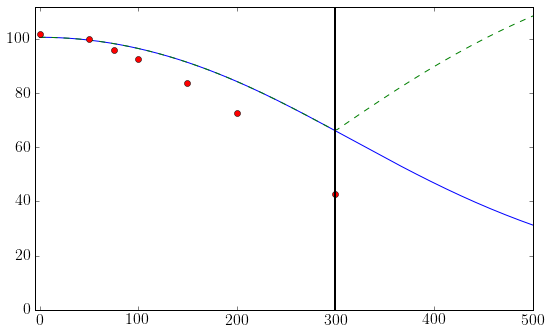

In [425]:
plt.figure(figsize=(8,5))
plt.plot(fields, energies)
plt.plot(fields, energies_2, ls='--')
plt.plot(Bs, Es, 'o')
plt.xlim(-5, 500)
plt.ylim(0, 112)
plt.axvline(Bc, c='k', lw=2)

## Fit following ground state

In [426]:
tau, D = 0.56, 151.8
beta_c = np.sqrt(1-tau)/np.sqrt(tau)
(popt, pcov, infodict, errmsg, ier) = leastsq(residuals_transition_energies, x0=[0.01],
                                              args=(Bs, Es, tau, D, False), full_output=1)
fields = np.linspace(0, 1000, 200)
energies = np.array([transition_energy([f * popt[0]], tau, D, False) for f in fields])
print 'E_T/g: ', ET_over_G(popt[0])
print 'Bc: ', beta_c / popt[0]

E_T/g:  19.5621581809
Bc:  299.999998561


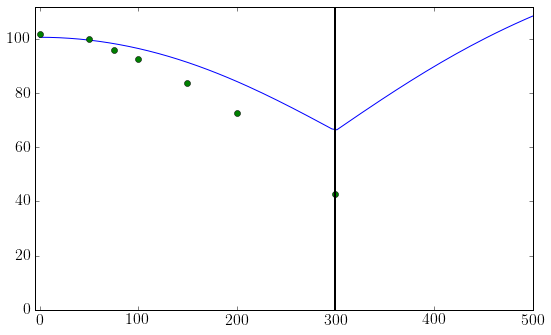

In [427]:
plt.figure(figsize=(8,5))
plt.plot(fields, energies)
plt.plot(Bs, Es, 'o')
plt.xlim(-5, 500)
plt.ylim(0, 112)
plt.axvline(Bc, c='k', lw=2)